Profiling Installation

---



In [ ]:
! pip install -U pandas-profiling

Necessary Libraries Importing

---



In [3]:
import pandas as pd
import numpy as np
import pandas_profiling
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
from sklearn.compose import make_column_transformer
#from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap
from sklearn import metrics
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.base import BaseEstimator, ClassifierMixin

Mount the drive

---



In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Read the data

---



In [7]:
df = pd.read_csv('/content/drive/MyDrive/Project Sem 6/ML/Crop_recommendation.csv')

Data Analysis

---



In [7]:
df.profile_report()

Output hidden; open in https://colab.research.google.com to view.

In [8]:
df.label.value_counts()

papaya         100
chickpea       100
lentil         100
muskmelon      100
pigeonpeas     100
watermelon     100
mango          100
apple          100
coffee         100
blackgram      100
pomegranate    100
coconut        100
rice           100
banana         100
orange         100
maize          100
jute           100
kidneybeans    100
cotton         100
grapes         100
mungbean       100
mothbeans      100
Name: label, dtype: int64

Pre-processing

---



In [8]:
# Convert type of target column "Label"
df["label"] = df["label"].astype('category')
df.dtypes

N                 int64
P                 int64
K                 int64
temperature     float64
humidity        float64
ph              float64
rainfall        float64
label          category
dtype: object

In [9]:
# See which code is allocate to what item
d = dict(enumerate(df["label"].cat.categories))
print (d)

{0: 'apple', 1: 'banana', 2: 'blackgram', 3: 'chickpea', 4: 'coconut', 5: 'coffee', 6: 'cotton', 7: 'grapes', 8: 'jute', 9: 'kidneybeans', 10: 'lentil', 11: 'maize', 12: 'mango', 13: 'mothbeans', 14: 'mungbean', 15: 'muskmelon', 16: 'orange', 17: 'papaya', 18: 'pigeonpeas', 19: 'pomegranate', 20: 'rice', 21: 'watermelon'}


In [10]:
# Actual Encoding
df["label"] = df["label"].cat.codes

In [13]:
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,20
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,5
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,5
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,5
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,5


Train-test spilt

---



In [11]:
x = df.drop('label', axis=1)
y = df['label']
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=4)  
print(x_train.shape)
print(y_train.shape)

(1650, 7)
(1650,)


KNN

---



In [19]:
# For different values of K - run a loop to find optimal value
k_range = range(1, 100)
scores = {}
scores_list = []
for k in k_range:
  knn = KNeighborsClassifier(n_neighbors=k) # Classifier
  knn.fit(x_train, y_train)                 # Model.fit
  y_pred = knn.predict(x_test)              # Prediction
  scores[k] = metrics.accuracy_score(y_test,y_pred)
  scores_list.append(metrics.accuracy_score(y_test,y_pred))


print(scores)
print(scores_list)

{1: 0.9709090909090909, 2: 0.9672727272727273, 3: 0.9727272727272728, 4: 0.9727272727272728, 5: 0.9727272727272728, 6: 0.9709090909090909, 7: 0.9709090909090909, 8: 0.9690909090909091, 9: 0.9654545454545455, 10: 0.9709090909090909, 11: 0.9672727272727273, 12: 0.9636363636363636, 13: 0.9654545454545455, 14: 0.9636363636363636, 15: 0.9618181818181818, 16: 0.9618181818181818, 17: 0.9672727272727273, 18: 0.9618181818181818, 19: 0.96, 20: 0.9636363636363636, 21: 0.9654545454545455, 22: 0.9636363636363636, 23: 0.9636363636363636, 24: 0.9618181818181818, 25: 0.9618181818181818, 26: 0.9636363636363636, 27: 0.9618181818181818, 28: 0.9581818181818181, 29: 0.9545454545454546, 30: 0.9472727272727273, 31: 0.9545454545454546, 32: 0.9527272727272728, 33: 0.9490909090909091, 34: 0.9490909090909091, 35: 0.9490909090909091, 36: 0.9436363636363636, 37: 0.9418181818181818, 38: 0.9381818181818182, 39: 0.9454545454545454, 40: 0.9418181818181818, 41: 0.9454545454545454, 42: 0.9454545454545454, 43: 0.94545454

Text(0, 0.5, 'Testing Accuracy')

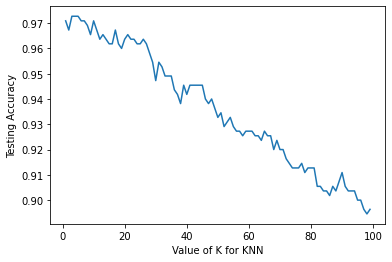

In [20]:
plt.plot(k_range, scores_list)
plt.xlabel('K value For KNN')
plt.ylabel('Testing Accuracy')

In [32]:
# Fit for optimal value
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x, y)
y_pred = knn.predict(x_test)  

In [33]:
classes = list(set(y_test))
cm = confusion_matrix(y_test, y_pred, labels=classes)
print("KNN model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)

KNN model accuracy(in %): 97.63636363636363


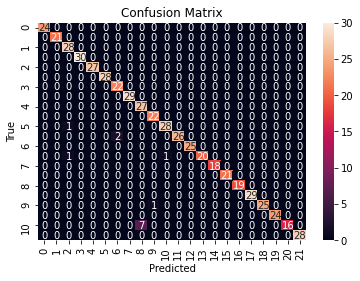

In [37]:
#Confusion Metrix

import seaborn as sns
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax);
ax.set_xlabel('Predicted');
ax.set_ylabel('True');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(classes);
ax.yaxis.set_ticklabels(classes);
plt.show()

In [38]:
# Other prediction Params
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       1.00      1.00      1.00        21
           2       0.93      1.00      0.97        28
           3       1.00      1.00      1.00        30
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        28
           6       0.92      1.00      0.96        22
           7       1.00      1.00      1.00        29
           8       0.79      1.00      0.89        27
           9       0.96      1.00      0.98        22
          10       0.97      0.97      0.97        29
          11       1.00      0.93      0.96        28
          12       1.00      1.00      1.00        25
          13       1.00      0.91      0.95        22
          14       1.00      1.00      1.00        18
          15       1.00      1.00      1.00        21
          16       1.00      1.00      1.00        19
          17       1.00    

Naive Bayes

---



In [54]:
from sklearn.naive_bayes import GaussianNB  
classifier = GaussianNB()
classifier.fit(x_train, y_train)  
y_pred = classifier.predict(x_test)  

In [55]:
classes = list(set(y_test))
cm = confusion_matrix(y_test, y_pred, labels=classes)
print("Naive bayesian model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)

Naive bayesian model accuracy(in %): 99.0909090909091


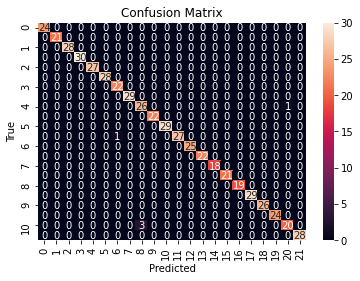

In [56]:
#Confusion Metrix

import seaborn as sns
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax);
ax.set_xlabel('Predicted');
ax.set_ylabel('True');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(classes);
ax.yaxis.set_ticklabels(classes);
plt.show()

In [57]:
# Other prediction Params
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        28
           3       1.00      1.00      1.00        30
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        28
           6       0.96      1.00      0.98        22
           7       1.00      1.00      1.00        29
           8       0.90      0.96      0.93        27
           9       1.00      1.00      1.00        22
          10       1.00      1.00      1.00        29
          11       1.00      0.96      0.98        28
          12       1.00      1.00      1.00        25
          13       1.00      1.00      1.00        22
          14       1.00      1.00      1.00        18
          15       1.00      1.00      1.00        21
          16       1.00      1.00      1.00        19
          17       1.00    

Support Vector Machine

---



In [74]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='poly')
svclassifier.fit(x_train, y_train)
y_pred = svclassifier.predict(x_test)

In [75]:
classes = list(set(y_test))
cm = confusion_matrix(y_test, y_pred, labels=classes)
print("SVM model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)

SVM model accuracy(in %): 97.81818181818181


Grid Search for finding optimal value o fthe parameters

---



In [94]:
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'degree':[2,3],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['poly']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(x_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] C=0.1, degree=2, gamma=1, kernel=poly ...........................
[CV]  C=0.1, degree=2, gamma=1, kernel=poly, score=0.982, total=   0.1s
[CV] C=0.1, degree=2, gamma=1, kernel=poly ...........................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  C=0.1, degree=2, gamma=1, kernel=poly, score=0.982, total=   1.0s
[CV] C=0.1, degree=2, gamma=1, kernel=poly ...........................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.1s remaining:    0.0s


[CV]  C=0.1, degree=2, gamma=1, kernel=poly, score=0.973, total=   0.2s
[CV] C=0.1, degree=2, gamma=1, kernel=poly ...........................
[CV]  C=0.1, degree=2, gamma=1, kernel=poly, score=0.982, total=   2.6s
[CV] C=0.1, degree=2, gamma=1, kernel=poly ...........................
[CV]  C=0.1, degree=2, gamma=1, kernel=poly, score=0.985, total=   2.1s
[CV] C=0.1, degree=2, gamma=0.1, kernel=poly .........................
[CV]  C=0.1, degree=2, gamma=0.1, kernel=poly, score=0.982, total=   0.1s
[CV] C=0.1, degree=2, gamma=0.1, kernel=poly .........................
[CV]  C=0.1, degree=2, gamma=0.1, kernel=poly, score=0.985, total=   0.5s
[CV] C=0.1, degree=2, gamma=0.1, kernel=poly .........................
[CV]  C=0.1, degree=2, gamma=0.1, kernel=poly, score=0.976, total=   0.0s
[CV] C=0.1, degree=2, gamma=0.1, kernel=poly .........................
[CV]  C=0.1, degree=2, gamma=0.1, kernel=poly, score=0.985, total=   0.2s
[CV] C=0.1, degree=2, gamma=0.1, kernel=poly .................

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:  2.8min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000], 'degree': [2, 3],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['poly']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [102]:
# Fit for the optimall parameter
svclassifier = SVC(kernel='poly', C=10, degree=2)
svclassifier.fit(x_train, y_train)
y_pred = svclassifier.predict(x_test)

In [103]:

classes = list(set(y_test))
cm = confusion_matrix(y_test, y_pred, labels=classes)
print("SVM model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)

SVM model accuracy(in %): 98.36363636363636


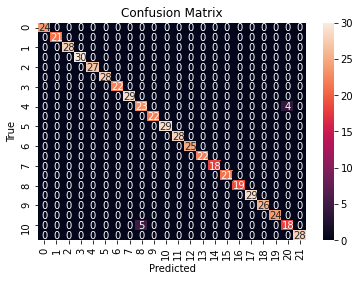

In [104]:
#Confusion Metrix

import seaborn as sns
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax);
ax.set_xlabel('Predicted');
ax.set_ylabel('True');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(classes);
ax.yaxis.set_ticklabels(classes);
plt.show()

In [105]:

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        28
           3       1.00      1.00      1.00        30
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        28
           6       1.00      1.00      1.00        22
           7       1.00      1.00      1.00        29
           8       0.82      0.85      0.84        27
           9       1.00      1.00      1.00        22
          10       1.00      1.00      1.00        29
          11       1.00      1.00      1.00        28
          12       1.00      1.00      1.00        25
          13       1.00      1.00      1.00        22
          14       1.00      1.00      1.00        18
          15       1.00      1.00      1.00        21
          16       1.00      1.00      1.00        19
          17       1.00    

SVM from Scratch

---



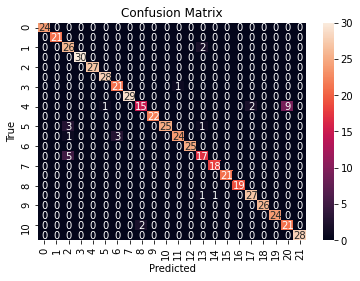

In [111]:
#Confusion Metrix

import seaborn as sns
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax);
ax.set_xlabel('Predicted');
ax.set_ylabel('True');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(classes);
ax.yaxis.set_ticklabels(classes);
plt.show()